#📌 Extracción

In [1]:
!pip install requests pandas
# Importar las librerías necesarias
import requests
import pandas as pd


In [2]:
# URL de la API (sustituye esta URL con la que te hayan proporcionado)
api_url = "https://raw.githubusercontent.com/vene23/ALURA-ORACLE-DataScience/refs/heads/main/TelecomX_Data.json"  # Asegúrate de reemplazarla con la URL correcta

# Hacer una solicitud GET a la API
response = requests.get(api_url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Obtener los datos JSON de la respuesta
    data = response.json()

    # Mostrar la longitud de los datos para saber si fueron cargados correctamente
    print(f"Datos obtenidos: {len(data)} registros")
else:
    print(f"Error al acceder a la API. Código de estado: {response.status_code}")


Datos obtenidos: 7267 registros


In [3]:
# Convertir los datos JSON en un DataFrame de Pandas
df = pd.DataFrame(data)

# Mostrar las primeras filas para verificar que los datos se cargaron correctamente
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##Explorar Datos

In [6]:
# Verificar las columnas y tipos de datos
df.info()

# Verificar las estadísticas descriptivas del DataFrame
df.describe()

# Verificar los tipos de datos de cada columna
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [8]:
# Expandir la columna 'customer' (que tiene diccionarios) en columnas separadas
customer_df = pd.json_normalize(df['customer'])

# Expandir la columna 'phone' (que tiene diccionarios) en columnas separadas
phone_df = pd.json_normalize(df['phone'])

# Expandir la columna 'internet' (que tiene diccionarios) en columnas separadas
internet_df = pd.json_normalize(df['internet'])

# Expandir la columna 'account' (que tiene diccionarios) en columnas separadas
account_df = pd.json_normalize(df['account'])

# Ahora, puedes eliminar las columnas originales que contenían diccionarios
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Concatenar las nuevas columnas expandidas al DataFrame original
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

# Verificar los primeros registros para asegurarte de que todo esté bien
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Limpieza de datos

In [20]:
# Convertir las columnas "Yes"/"No" en valores binarios (0 y 1)
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Revisar si hay valores nulos
print(df.isnull().sum())

customerID             0
Churn               7267
gender                 0
SeniorCitizen          0
Partner             7267
Dependents          7267
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
Charges.Monthly        0
Charges.Total          0
TotalMensual           0
dtype: int64


#🔧 Transformación

In [21]:
# Create a new column based on existing columns
df['TotalMensual'] = df['Charges.Monthly']

# Verify the result
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,TotalMensual
0,0002-ORFBO,NaN,Female,0,NaN,NaN,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,65.6
1,0003-MKNFE,NaN,Male,0,NaN,NaN,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,59.9
2,0004-TLHLJ,NaN,Male,0,NaN,NaN,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,73.9
3,0011-IGKFF,NaN,Male,1,NaN,NaN,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,98.0
4,0013-EXCHZ,NaN,Female,1,NaN,NaN,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,83.9


#📊 Carga y análisis

In [25]:
# Verificar si hay valores faltantes en 'Churn' antes de eliminarlos
if df['Churn'].isnull().any():
    print(f"Se eliminaron {df['Churn'].isnull().sum()} filas con valores faltantes en 'Churn'.")
    df.dropna(subset=['Churn'], inplace=True)
else:
    print("No hay valores faltantes en 'Churn'.")

# Asegurarse de que la columna 'Churn' no esté vacía después de la eliminación
if not df['Churn'].empty:
    # Convertir Churn a tipo entero (representa valores binarios 0 y 1)
    df['Churn'] = df['Churn'].astype(int)

    # Verificar la distribución de 'Churn'
    print(df['Churn'].value_counts())

    # Visualizar la distribución con un gráfico de barras
    import matplotlib.pyplot as plt
    churn_counts = df['Churn'].value_counts()

    if not churn_counts.empty:
        churn_counts.plot(kind='bar', color=['green', 'red'])
        plt.title('Distribución de Churn (Evasión de clientes)')
        plt.xlabel('Churn')
        plt.ylabel('Número de clientes')
        plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'], rotation=0)
        plt.show()
    else:
        print("No hay datos suficientes para graficar.")
else:
    print("La columna 'Churn' está vacía después de eliminar los valores faltantes.")


No hay valores faltantes en 'Churn'.
La columna 'Churn' está vacía después de eliminar los valores faltantes.


In [26]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


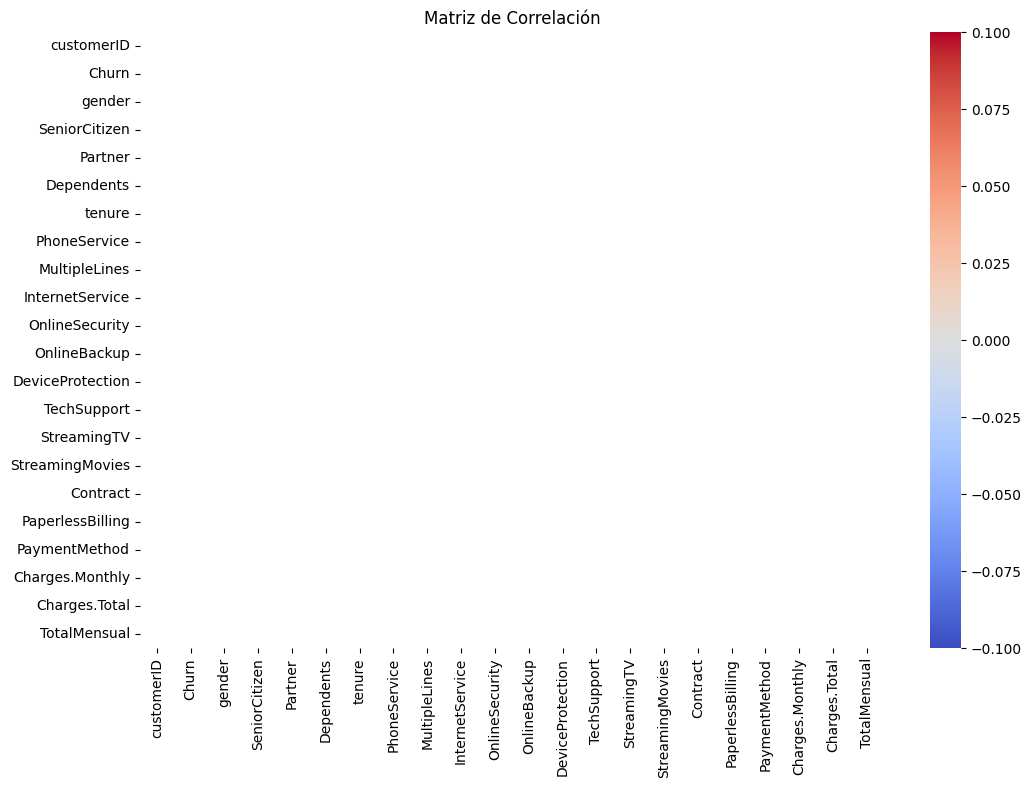

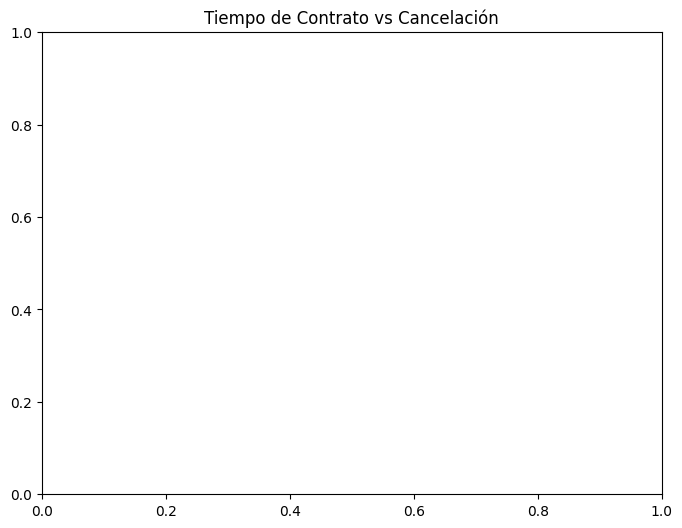

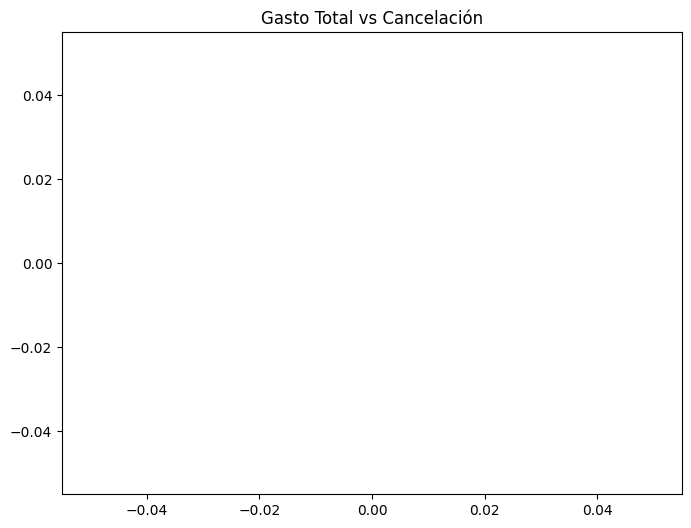

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [27]:
# Cargar el DataFrame previamente limpiado
# Suponiendo que el DataFrame df ya ha sido limpiado y transformado.

# 1. Visualización de la matriz de correlación
corr_matrix = df.corr()  # Matriz de correlación para variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# 2. Visualización de relaciones específicas con la cancelación
# Tiempo de contrato vs Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tiempo de Contrato vs Cancelación')
plt.show()

# Gasto total vs Cancelación
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Charges.Total', y='Churn', data=df)
plt.title('Gasto Total vs Cancelación')
plt.show()

# 3. Separación de datos en entrenamiento y prueba
X = df.drop(columns=['Churn'])  # Variables independientes
y = df['Churn']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y prueba (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Modelos predictivos

# Modelo 1: Regresión Logística (requiere normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Modelo 2: Árbol de Decisión (no requiere normalización)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# 5. Evaluación de los modelos

# Evaluar modelo 1: Regresión Logística
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Regresión Logística:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precisión: {precision_score(y_test, y_pred_log_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg)}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg)}")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log_reg))

# Evaluar modelo 2: Árbol de Decisión
y_pred_tree = tree.predict(X_test)
print("\nÁrbol de Decisión:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_tree)}")
print(f"Precisión: {precision_score(y_test, y_pred_tree)}")
print(f"Recall: {recall_score(y_test, y_pred_tree)}")
print(f"F1-Score: {f1_score(y_test, y_pred_tree)}")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_tree))

# Comparación de modelos
print("\nComparación de Modelos:")
if accuracy_score(y_test, y_pred_log_reg) > accuracy_score(y_test, y_pred_tree):
    print("La Regresión Logística es el mejor modelo en términos de exactitud.")
else:
    print("El Árbol de Decisión es el mejor modelo en términos de exactitud.")

# 6. Análisis de la importancia de las variables
# Regresión Logística: Coeficientes
print("\nImportancia de las variables (Regresión Logística):")
coef = pd.Series(log_reg.coef_[0], index=X.columns)
print(coef.sort_values(ascending=False))

# Árbol de Decisión: Importancia de las variables
print("\nImportancia de las variables (Árbol de Decisión):")
importances = pd.Series(tree.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))
